# Plane wave and rotation 

First, a plane wave.

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = np.linspace(-10, 10, num=50)

In [4]:
y = np.linspace(-20, 20, num=100)

In [5]:
X, Y = np.meshgrid(x, y)

In [6]:
def plane_wave(wavevector, X, Y, phase_origin):
    "Returns a field emitted by a plane wave with a given phase origin."
    x_0, y_0 = phase_origin
    phases = np.exp(1j * np.dot(np.c_[X.reshape(X.size, 1) - x_0,
                                      Y.reshape(Y.size, 1) - y_0], wavevector))
    return phases.reshape(X.shape)

Let's check the output of this.

In [7]:
k = np.array([[1],
              [0]])

<IPython.core.display.Javascript object>


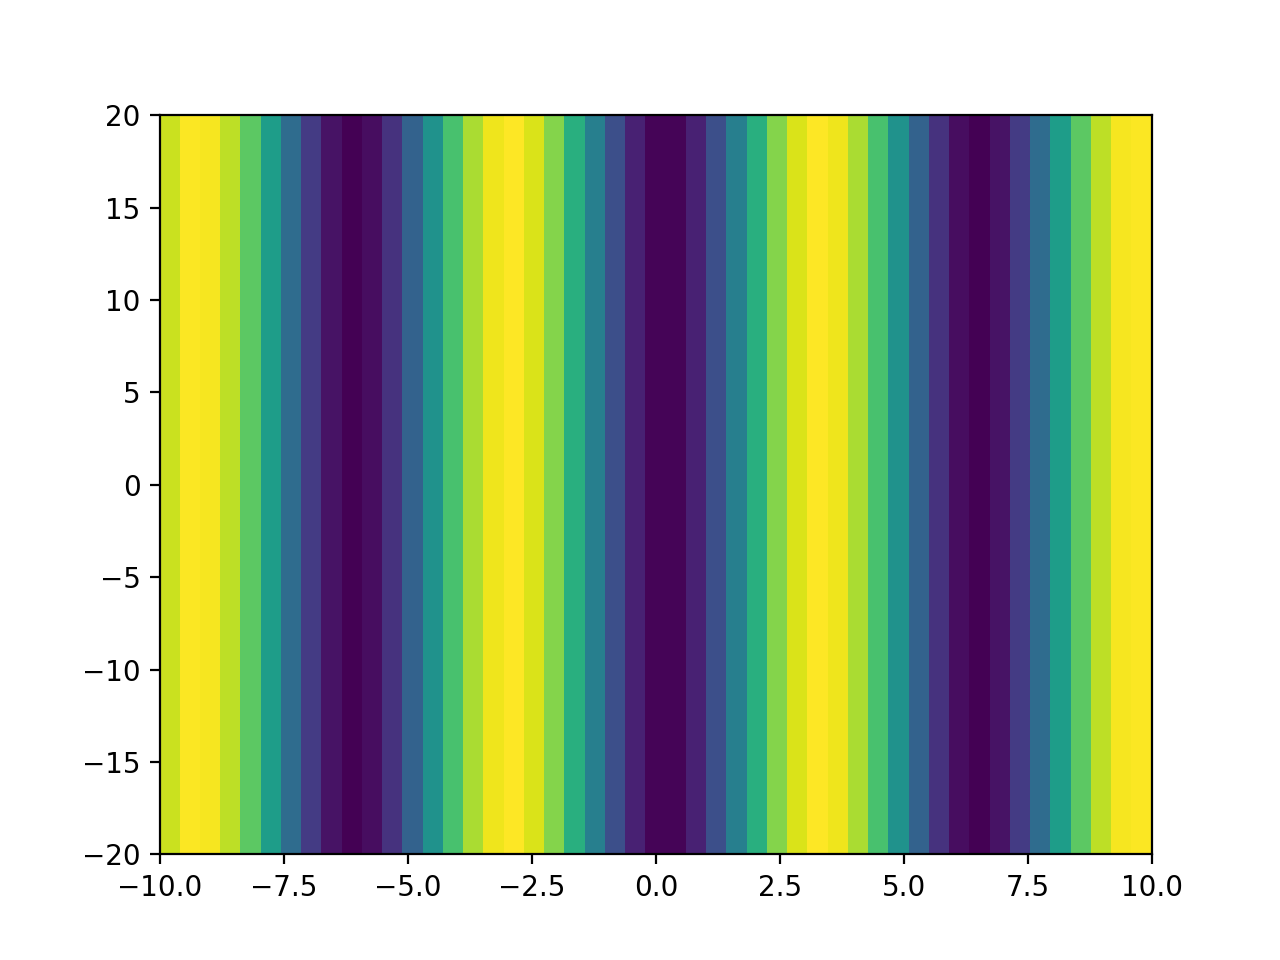

In [8]:
plt.figure()
plt.pcolormesh(x, y, np.real(plane_wave(k, X, Y, (0, 0))))

What if we move the origin?

In [9]:
plt.pcolormesh(x, y, np.real(plane_wave(k, X, Y, (np.pi, 0))))

In [10]:
def rotation(theta):
    "Returns 2D rotation matrix of angle theta (in degrees)."
    theta_rad = np.deg2rad(theta)
    return np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                     [np.sin(theta_rad), np.cos(theta_rad)]])

<IPython.core.display.Javascript object>


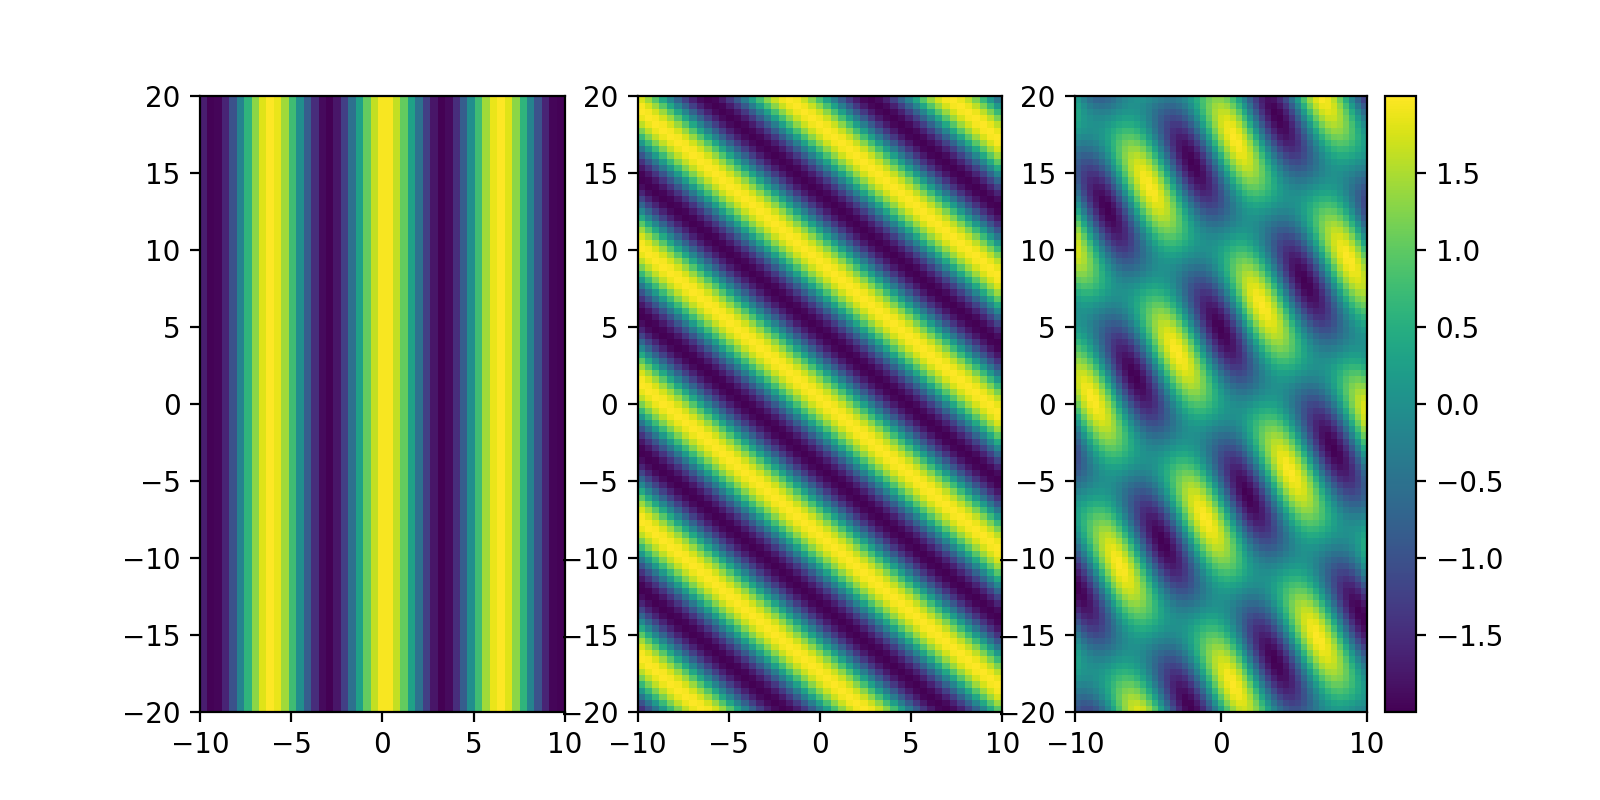

In [12]:
plt.figure(figsize=(8, 4))
for ind, theta in enumerate([0, 45, 90]):
    plt.subplot(1, 3, ind+1)
    rotated_k = np.dot(rotation(theta), k)
    plt.pcolormesh(x, y, np.real(plane_wave(rotated_k, X, Y, (0, 0))))

# Two sources 

Now, let's add two sources together, with different angles.

In [26]:
pw1 = np.real(plane_wave(np.dot(rotation(45), k), X, Y, (0, 0)))
pw2 = np.real(plane_wave(np.dot(rotation(10), k), X, Y, (0, 0)))

<IPython.core.display.Javascript object>


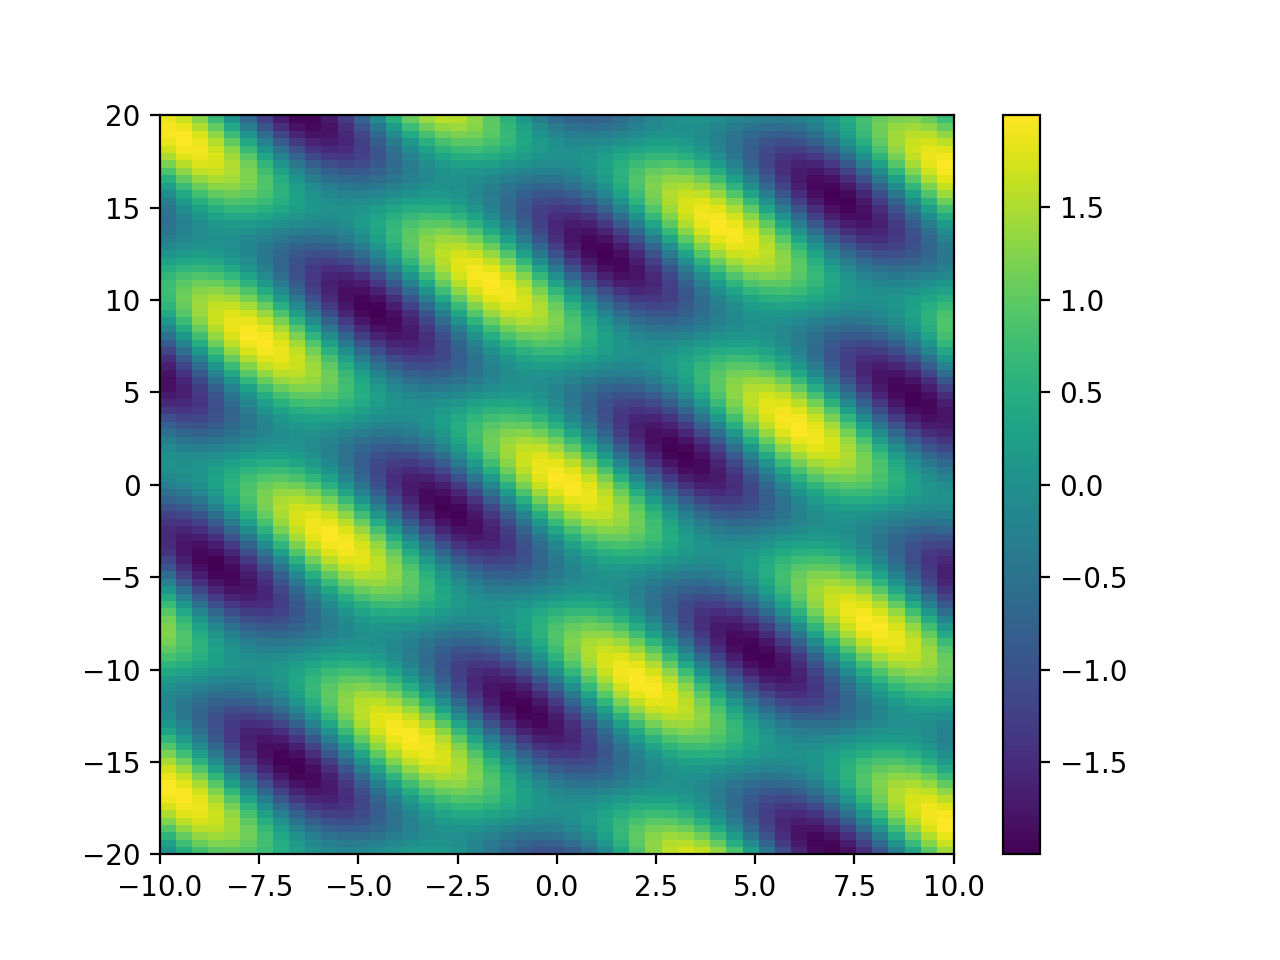

In [27]:
plt.figure()
plt.pcolormesh(x, y, pw1 + pw2)
plt.colorbar()

# Many sources 

What if we had a line of sources together?

In [16]:
pw = np.zeros_like(X)
for x_c in np.arange(-10, 15, 5):
    center = (x_c, -10)
    pw += np.real(plane_wave(np.dot(rotation(88), k), X, Y, center))

<IPython.core.display.Javascript object>


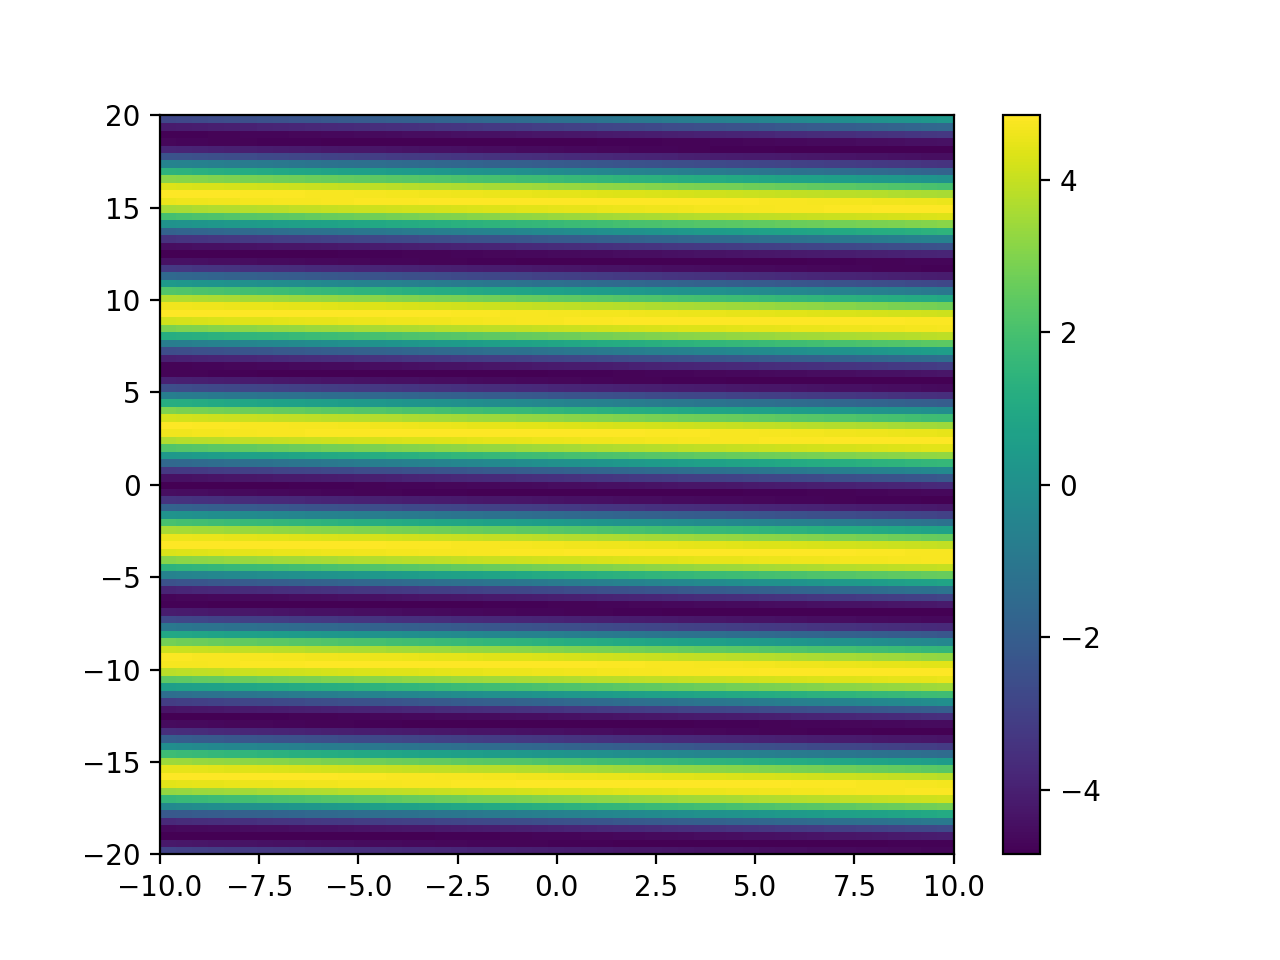

In [17]:
plt.figure()
plt.pcolormesh(x, y, pw)
plt.colorbar()

Let's plot the maximum of this function for various angles, between 0 and 90 degrees.

In [18]:
def plane_wave_sum(theta, centers):
    "Sums plane wave with a given theta."
    pw = np.zeros_like(X)
    for center in centers:
        pw += np.real(plane_wave(np.dot(rotation(theta), k), X, Y, center))
    return pw

In [19]:
def angular_sum(thetas, centers):
    max_field = np.zeros_like(thetas)
    for ind, theta in enumerate(thetas):
        pw = plane_wave_sum(theta, centers)
        max_field[ind] = np.max(pw)
    return max_field

In [20]:
thetas = np.arange(0, 90, 0.5)
centers = [(x_c, -10) for x_c in np.arange(-10, 11, 1)]
max_field = angular_sum(thetas, centers)

<IPython.core.display.Javascript object>


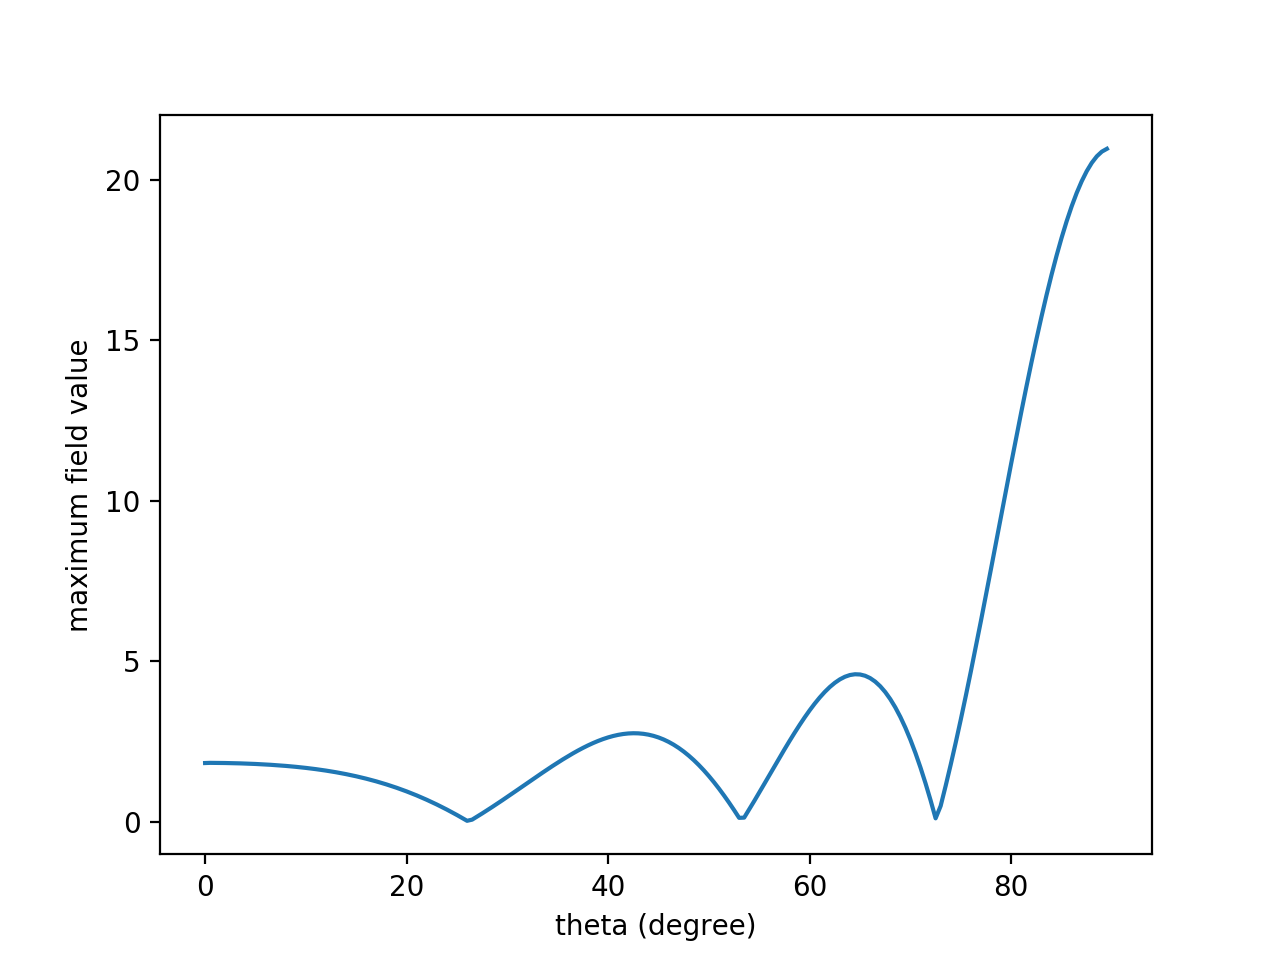

In [21]:
plt.figure()
plt.plot(thetas, max_field)
plt.xlabel('theta (degree)')
plt.ylabel('maximum field value')

We can see that there are some low and high values. Let's look at three high values.

<IPython.core.display.Javascript object>


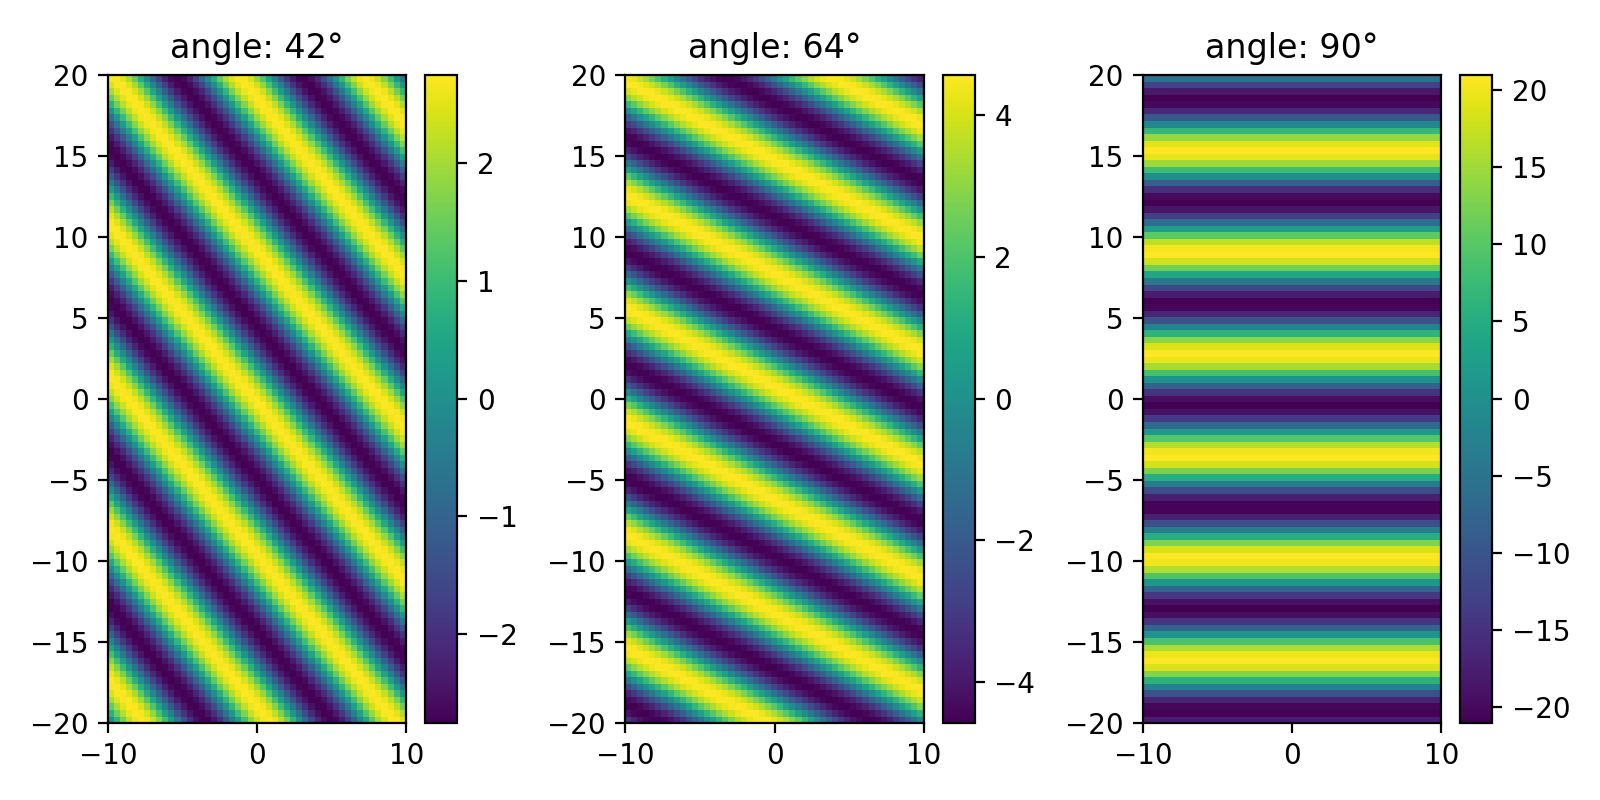

In [28]:
plt.figure(figsize=(8, 4))
for ind, theta in enumerate([42, 64, 90]):
    plt.subplot(1, 3, ind+1)
    pw = plane_wave_sum(theta, centers)
    plt.pcolormesh(x, y, pw)
    plt.colorbar()
    plt.title('angle: {}°'.format(theta))
plt.tight_layout()

And some low values:

<IPython.core.display.Javascript object>


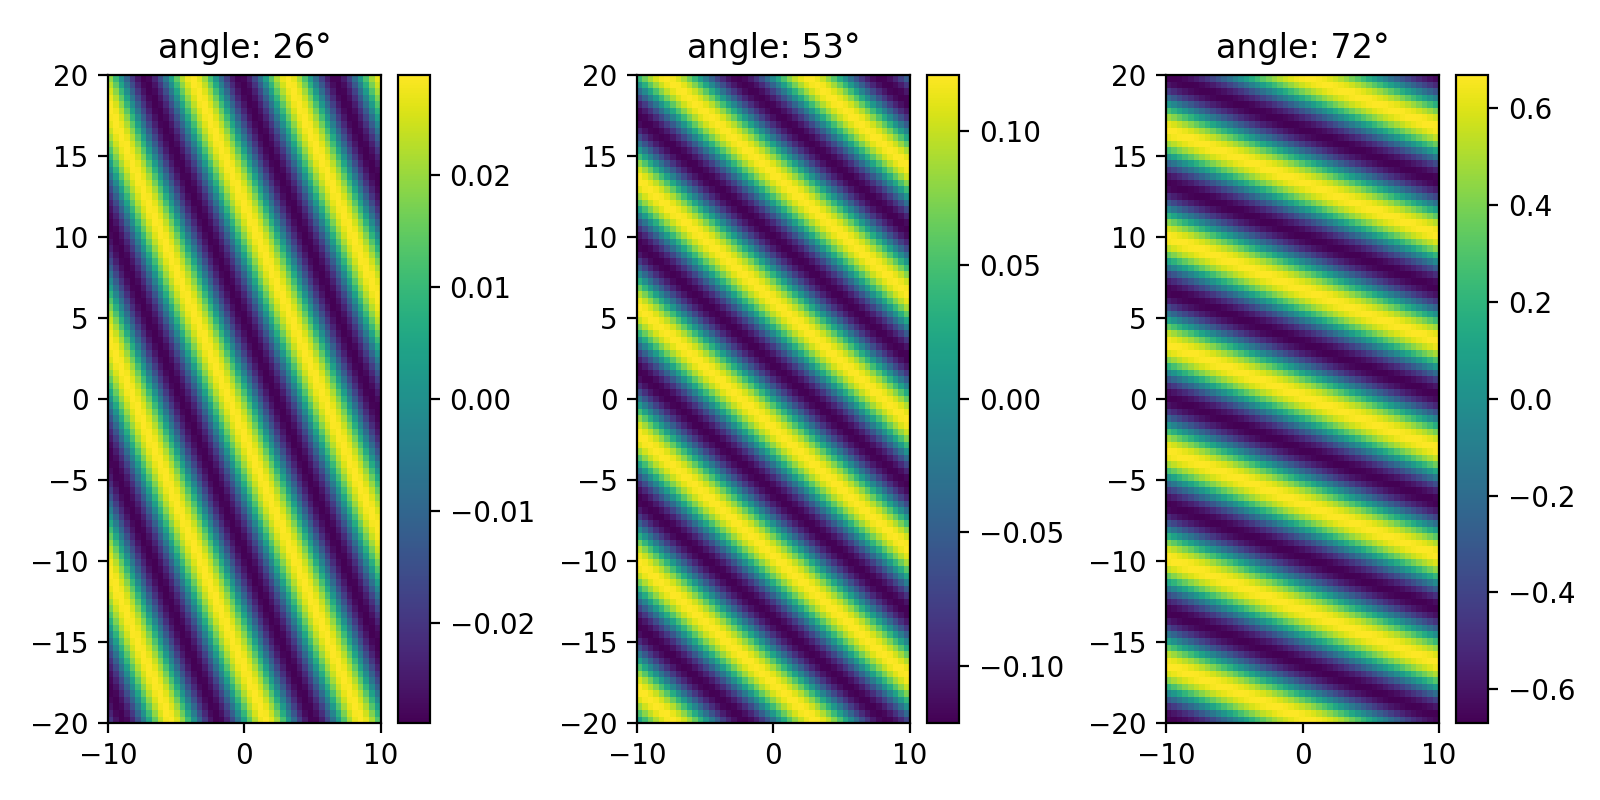

In [25]:
plt.figure(figsize=(8, 4))
for ind, theta in enumerate([26, 53, 72]):
    plt.subplot(1, 3, ind+1)
    pw = plane_wave_sum(theta, centers)
    plt.pcolormesh(x, y, pw)
    plt.colorbar()
    plt.title('angle: {}°'.format(theta))
plt.tight_layout()